In [1]:
#explorar los datos
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Diabetes = pd.read_csv('/content/drive/MyDrive/clases data science/diabetes.csv')
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
Diabetes.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


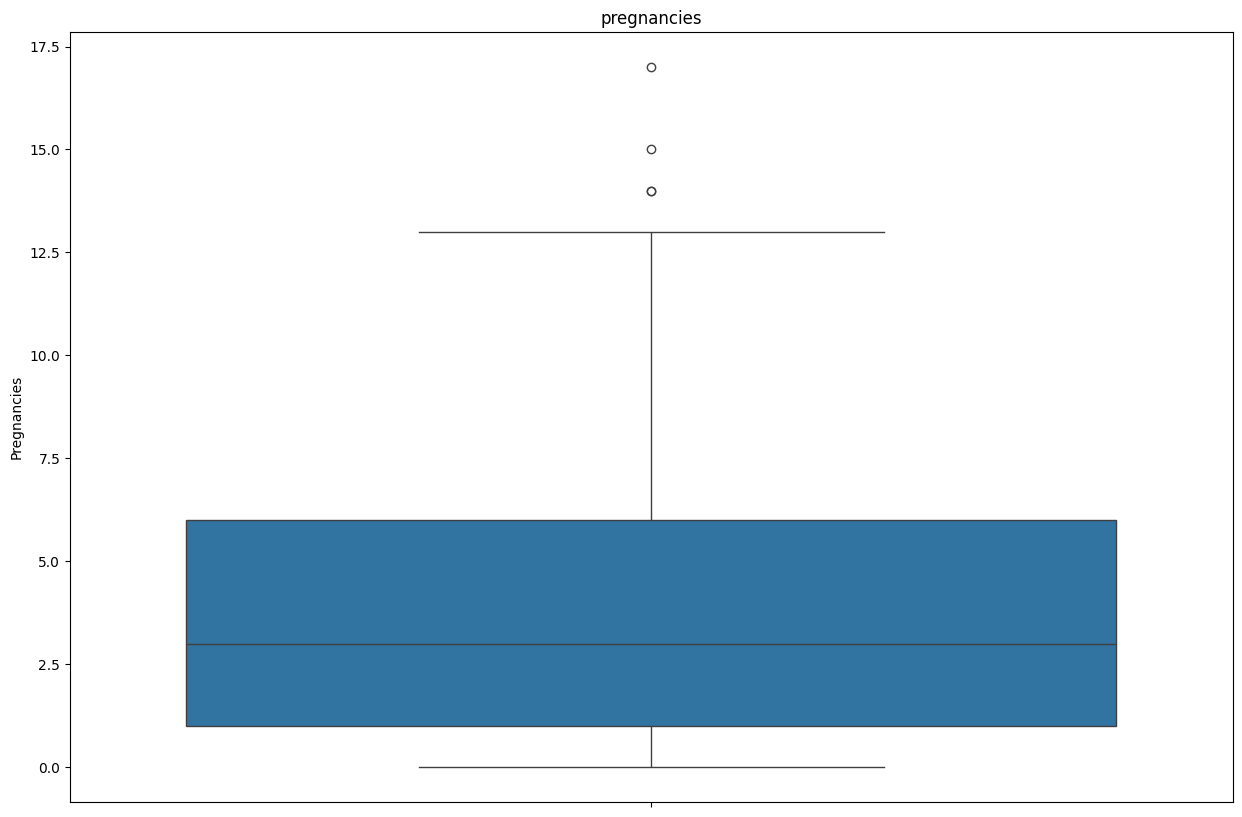

In [5]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=Diabetes['Pregnancies'])
plt.title('pregnancies')
plt.show()

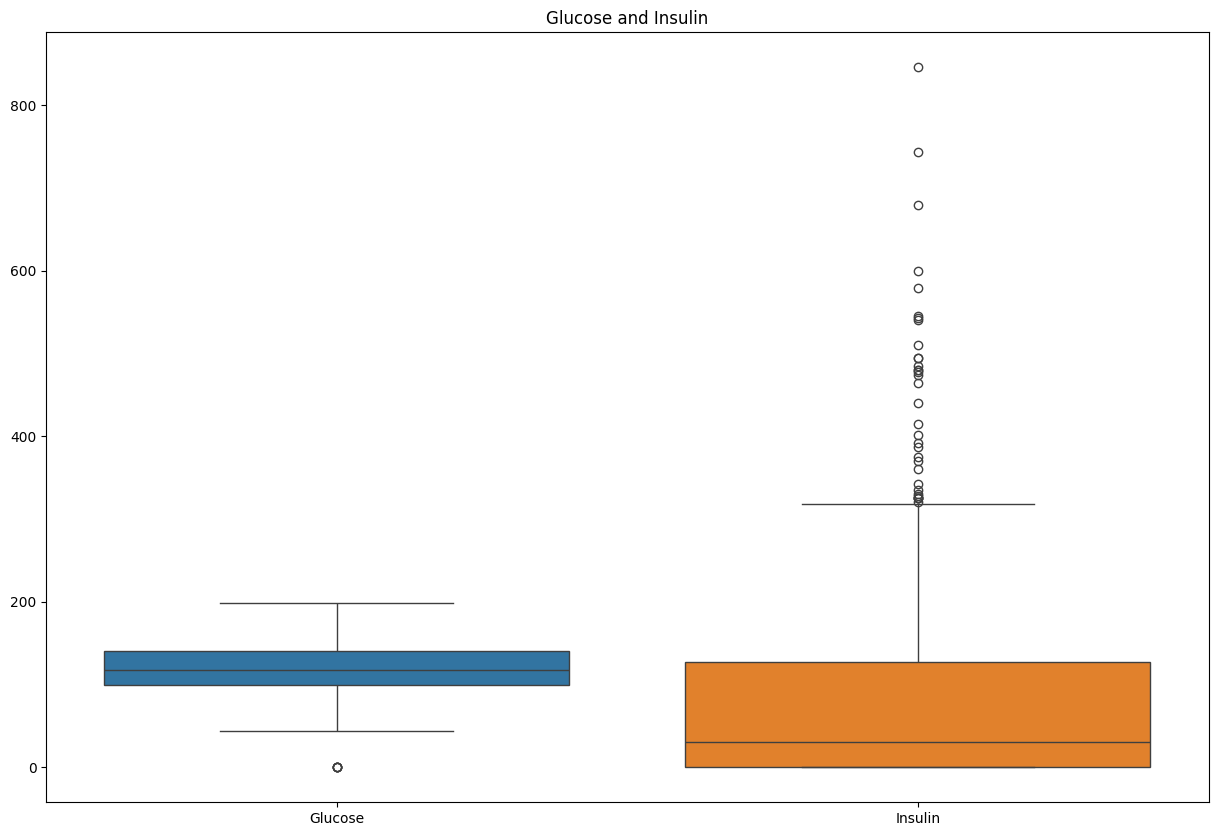

In [6]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=Diabetes[['Glucose','Insulin']])
plt.title('Glucose and Insulin')
plt.show()

In [7]:
#Preprocesamiento de datos:

In [8]:
Diabetes.isnull().sum() #revisar si hay datos nulos

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
## Revisar si tiene duplicados
Diabetes.duplicated().sum() ##- revisar si tengo duplicados

np.int64(0)

In [10]:
Diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Definir X = datos relacionados del data set excluyendo Outcome
Y = indican si tienes diabetes

In [11]:
X = Diabetes.drop('Outcome', axis=1)
y = Diabetes['Outcome']

Separar los datos en entrenamiento y prueba (SPLIT)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((652, 8), (116, 8), (652,), (116,))

Selección de Modelos

In [24]:
# Crear los modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier # Import

model_DT = DecisionTreeClassifier(random_state=42)
model_Bagging = BaggingClassifier(random_state=42)
model_RF = RandomForestClassifier(random_state=42)
model_AB = AdaBoostClassifier(random_state=42)
model_SVC = SVC(random_state=42)
model_ET = ExtraTreesClassifier(random_state=42)
model_KNN = KNeighborsClassifier()

 Entrenar los modelos (FIT)

In [25]:
model_DT.fit(X_train,y_train)
model_Bagging.fit(X_train,y_train)
model_RF.fit(X_train,y_train)
model_AB.fit(X_train,y_train)
model_SVC.fit(X_train,y_train)
model_ET.fit(X_train,y_train)
model_KNN.fit(X_train, y_train) # Fit the model

KNeighborsClassifier()

In [26]:
y_DT= model_DT.predict(X_test)
y_DT1=model_AB.predict(X_test)
y_DT2=model_Bagging.predict(X_test)
y_DT3=model_RF.predict(X_test)
y_DT4=model_SVC.predict(X_test)
y_DT5=model_ET.predict(X_test)
y_DT6=model_KNN.predict(X_test) # Predict

In [16]:
vamos a revisar el entrenamiento de cada uno de los modelos


 - Accuracy: 0.7069 | F1 Macro: 0.6673
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        76
           1       0.58      0.53      0.55        40

    accuracy                           0.71       116
   macro avg       0.67      0.66      0.67       116
weighted avg       0.70      0.71      0.70       116



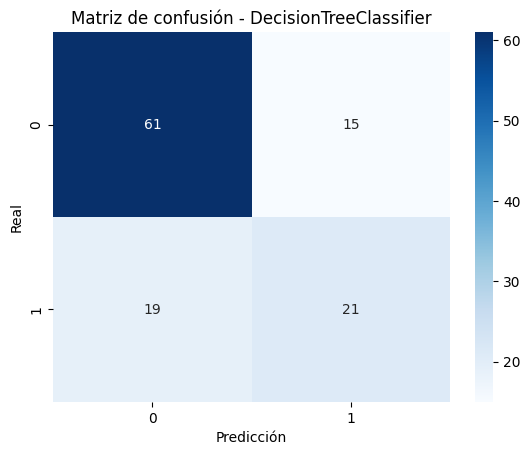

In [61]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# EVALUAR MODELO DecisionTreeClassifier
y_DT = model_DT.predict(X_test)
acc = accuracy_score(y_test, y_DT)
f1_macro = f1_score(y_test, y_DT, average='macro')

print(f"\n - Accuracy: {acc:.4f} | F1 Macro: {f1_macro:.4f}")
print(classification_report(y_test, y_DT))
cm = confusion_matrix(y_test, y_DT)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de confusión - DecisionTreeClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


 - Accuracy: 0.7672 | F1 Macro: 0.7340
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        76
           1       0.69      0.60      0.64        40

    accuracy                           0.77       116
   macro avg       0.74      0.73      0.73       116
weighted avg       0.76      0.77      0.76       116



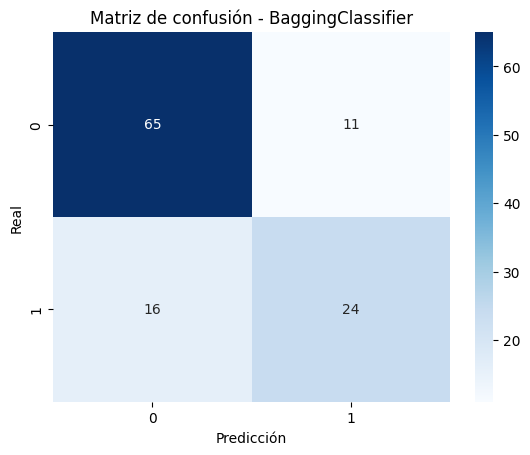

In [59]:
# EVALUAR MODELO  BaggingClassifier
acc = accuracy_score(y_test, y_DT1)
f1_macro = f1_score(y_test, y_DT1, average='macro')

print(f"\n - Accuracy: {acc:.4f} | F1 Macro: {f1_macro:.4f}")
print(classification_report(y_test, y_DT1))
cm = confusion_matrix(y_test, y_DT1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de confusión - BaggingClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


 - Accuracy: 0.7586 | F1 Macro: 0.7136
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        76
           1       0.70      0.53      0.60        40

    accuracy                           0.76       116
   macro avg       0.74      0.70      0.71       116
weighted avg       0.75      0.76      0.75       116



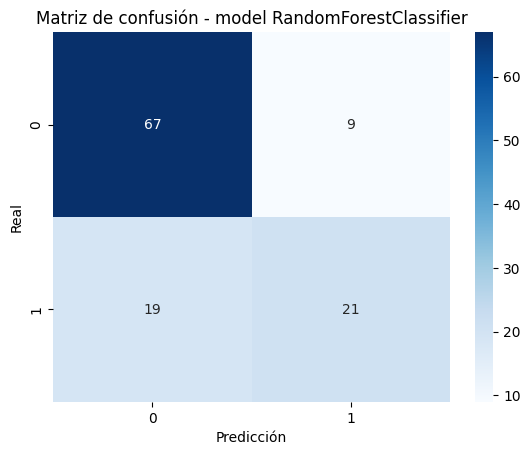

In [58]:
acc = accuracy_score(y_test, y_DT2) #model RandomForestClassifier
f1_macro = f1_score(y_test, y_DT2, average='macro')

print(f"\n - Accuracy: {acc:.4f} | F1 Macro: {f1_macro:.4f}")
print(classification_report(y_test, y_DT2))
cm = confusion_matrix(y_test, y_DT2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de confusión - model RandomForestClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


 - Accuracy: 0.7500 | F1 Macro: 0.7250
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        76
           1       0.63      0.65      0.64        40

    accuracy                           0.75       116
   macro avg       0.72      0.73      0.72       116
weighted avg       0.75      0.75      0.75       116



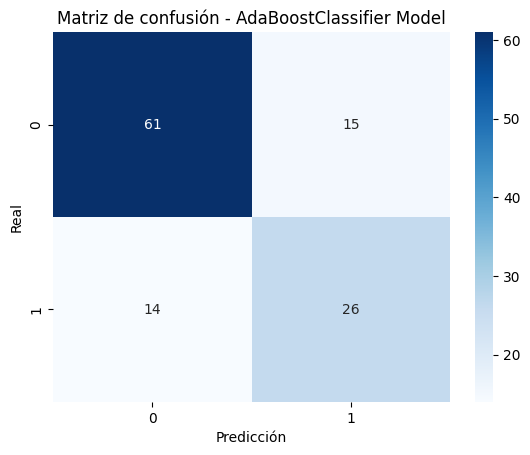

In [57]:
acc = accuracy_score(y_test, y_DT3) #AdaBoostClassifier Model
f1_macro = f1_score(y_test, y_DT3, average='macro')

print(f"\n - Accuracy: {acc:.4f} | F1 Macro: {f1_macro:.4f}")
print(classification_report(y_test, y_DT3))
cm = confusion_matrix(y_test, y_DT3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de confusión - AdaBoostClassifier Model')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


 - Accuracy: 0.7328 | F1 Macro: 0.6803
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        76
           1       0.66      0.47      0.55        40

    accuracy                           0.73       116
   macro avg       0.71      0.67      0.68       116
weighted avg       0.72      0.73      0.72       116



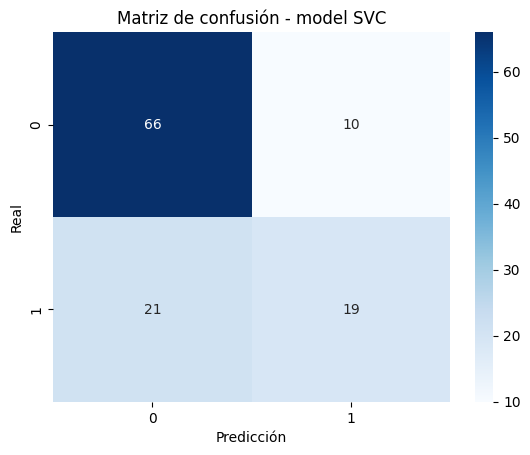

In [56]:
acc = accuracy_score(y_test, y_DT4) #model SVC
f1_macro = f1_score(y_test, y_DT4, average='macro')

print(f"\n - Accuracy: {acc:.4f} | F1 Macro: {f1_macro:.4f}")
print(classification_report(y_test, y_DT4))
cm = confusion_matrix(y_test, y_DT4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de confusión - model SVC')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


 - Accuracy: 0.7586 | F1 Macro: 0.7296
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        76
           1       0.66      0.62      0.64        40

    accuracy                           0.76       116
   macro avg       0.73      0.73      0.73       116
weighted avg       0.76      0.76      0.76       116



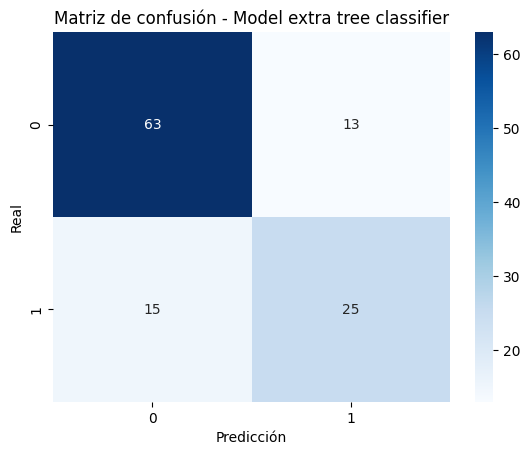

In [55]:
acc = accuracy_score(y_test, y_DT5) #Model extra tree classifier
f1_macro = f1_score(y_test, y_DT5, average='macro')

print(f"\n - Accuracy: {acc:.4f} | F1 Macro: {f1_macro:.4f}")
print(classification_report(y_test, y_DT5))
cm = confusion_matrix(y_test, y_DT5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de confusión - Model extra tree classifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


 - Accuracy: 0.6638 | F1 Macro: 0.6209
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        76
           1       0.51      0.47      0.49        40

    accuracy                           0.66       116
   macro avg       0.62      0.62      0.62       116
weighted avg       0.66      0.66      0.66       116



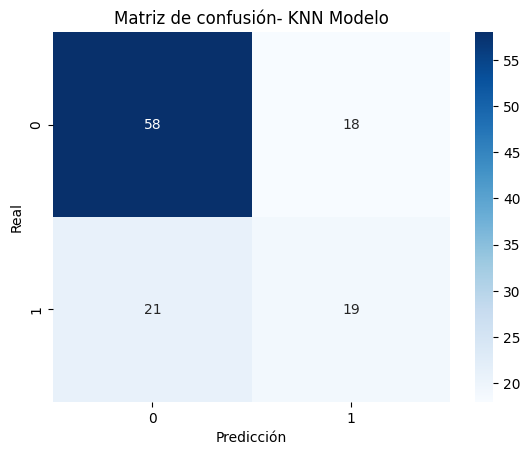

In [54]:
acc = accuracy_score(y_test, y_DT6) #KNN Modelo
f1_macro = f1_score(y_test, y_DT6, average='macro')

print(f"\n - Accuracy: {acc:.4f} | F1 Macro: {f1_macro:.4f}")
print(classification_report(y_test, y_DT6))
cm = confusion_matrix(y_test, y_DT6)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de confusión- KNN Modelo')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [29]:
X.shape

(768, 8)

In [34]:
X_train.shape

(652, 8)

In [35]:
X_test.shape

(116, 8)

In [50]:
# Probar con un dato sintetico
H=np.random.rand(1,8)

In [52]:
model_RF.predict_proba(H)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.95, 0.05]])

el modelo con mejor predicción es RandomForestClassifier, teniendo en cuenta la relación entre precisión y recall del 83% , aunque siendo este un modelo de prediccíón de un diágnostico se debe priorizar el evitar dar resultados como falsos negativos. De acuerdo a los datos dados, se incluyen algunas variables como embarazo y grosor de la piel, los cuales son realmente factores asociados al diágnostico o desarrollo de la misma enfermedad, auqnque en este caso se presenten algunos casos de embarazo de más de 10 hijos, esto puede estar relacionado al tipo de población al cual se testeo. Ya que algunas culturas pactican u obligan a sus mujeres a consolidar el matrimonio infantil, el cual termina en múltiples embarazos desde muy temprana edad.

 AdaBoostClassifier Model nos permite obtener una predicción del 80%  teniendo en cuenta el bajo número de casos de falsos negativos, el más alto entre los distintos modelos.

 Para generar un modelo con una tasa más alta de predicciones correctas, los datos deben ser tomados de una población que incluya varios grupos de prueba, no limitarse a un grupo etnico o sexo.